<a href="https://colab.research.google.com/github/Abinash-bit/AIresources/blob/main/test_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("/content/AG modified.csv")

In [8]:
df.shape

(6000, 5)

In [9]:
df.head()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
0,0.000000,0.049527,0.190896,0.130947,No
1,0.000167,0.055313,0.187909,0.123746,No
2,0.000333,0.060952,0.184199,0.116002,No
3,0.000500,0.066418,0.179768,0.107739,No
4,0.000667,0.071680,0.174620,0.098983,No


In [10]:
df.tail()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
5995,0.999127,0.135601,0.060845,0.179685,No
5996,0.999293,0.133126,0.067954,0.185650,No
5997,0.999460,0.130064,0.074860,0.190887,No
5998,0.999627,0.126422,0.081527,0.195361,No
5999,0.999793,0.122208,0.087923,0.199040,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6000 non-null   float64
 1   Absolute Ia  6000 non-null   float64
 2   Absolute Ib  6000 non-null   float64
 3   Absolute Ic  6000 non-null   float64
 4   Fault        6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [12]:
df.describe()

,Time,Absolute Ia,Absolute Ib,Absolute Ic
count,6000.000000,6.000000e+03,6000.000000,6000.000000
mean,0.499897,1.389776e-01,0.094485,0.140053
std,0.288688,1.735526e-01,0.054270,0.082787
min,0.000000,9.320000e-07,0.000016,0.000192
25%,0.249948,5.268184e-02,0.049293,0.079019
50%,0.499897,9.279907e-02,0.095474,0.143355
75%,0.749845,1.245182e-01,0.134000,0.181766
max,0.999793,1.024572e+00,0.275166,0.505077


In [13]:
df.isnull()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5995,False,False,False,False,False
5996,False,False,False,False,False
5997,False,False,False,False,False
5998,False,False,False,False,False


In [14]:
df.isnull().sum()

Time           0
Absolute Ia    0
Absolute Ib    0
Absolute Ic    0
Fault          0
dtype: int64

In [15]:
df["Fault"].value_counts()

No     4799
Yes    1201
Name: Fault, dtype: int64

In [16]:
df['Fault'] = df['Fault'].replace('No', 0).replace('Yes', 1)

In [17]:
df["Fault"].value_counts()

0    4799
1    1201
Name: Fault, dtype: int64

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
X.shape

(6000, 4)

In [20]:
y.shape

(6000,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split = 10, random_state = 100)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=5)

In [23]:
df.columns

Index(['Time', 'Absolute Ia', 'Absolute Ib', 'Absolute Ic', 'Fault'], dtype='object')

In [24]:
y_pred = clf.predict(X_test)

In [25]:
import numpy as np
np.set_printoptions(threshold=np.inf)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1235,    0],
       [   0,  265]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00


In [28]:
from sklearn.model_selection import cross_val_score
np.set_printoptions(threshold=np.inf)
cross_val_score(clf, X_train, y_train, cv = 10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99777778, 1.        , 1.        , 0.99777778, 1.        ])

In [29]:
from sklearn.metrics import classification_report
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1235\n           1       1.00      1.00      1.00       265\n\n    accuracy                           1.00      1500\n   macro avg       1.00      1.00      1.00      1500\nweighted avg       1.00      1.00      1.00      1500\n'

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1235
           1       1.00      1.00      1.00       265

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



**Decison tree Classifiers**


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
df = pd.read_csv("/content/AG modified.csv")

In [56]:
df.shape

(6000, 5)

In [57]:
df.head()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
0,0.000000,0.049527,0.190896,0.130947,No
1,0.000167,0.055313,0.187909,0.123746,No
2,0.000333,0.060952,0.184199,0.116002,No
3,0.000500,0.066418,0.179768,0.107739,No
4,0.000667,0.071680,0.174620,0.098983,No


In [38]:
df.tail()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
5995,0.999127,0.135601,0.060845,0.179685,No
5996,0.999293,0.133126,0.067954,0.185650,No
5997,0.999460,0.130064,0.074860,0.190887,No
5998,0.999627,0.126422,0.081527,0.195361,No
5999,0.999793,0.122208,0.087923,0.199040,No


In [39]:
df.info

<bound method DataFrame.info of           Time  Absolute Ia  Absolute Ib  Absolute Ic Fault
0     0.000000     0.049527     0.190896     0.130947    No
1     0.000167     0.055313     0.187909     0.123746    No
2     0.000333     0.060952     0.184199     0.116002    No
3     0.000500     0.066418     0.179768     0.107739    No
4     0.000667     0.071680     0.174620     0.098983    No
...        ...          ...          ...          ...   ...
5995  0.999127     0.135601     0.060845     0.179685    No
5996  0.999293     0.133126     0.067954     0.185650    No
5997  0.999460     0.130064     0.074860     0.190887    No
5998  0.999627     0.126422     0.081527     0.195361    No
5999  0.999793     0.122208     0.087923     0.199040    No

[6000 rows x 5 columns]>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6000 non-null   float64
 1   Absolute Ia  6000 non-null   float64
 2   Absolute Ib  6000 non-null   float64
 3   Absolute Ic  6000 non-null   float64
 4   Fault        6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [41]:
df.describe()

,Time,Absolute Ia,Absolute Ib,Absolute Ic
count,6000.000000,6.000000e+03,6000.000000,6000.000000
mean,0.499897,1.389776e-01,0.094485,0.140053
std,0.288688,1.735526e-01,0.054270,0.082787
min,0.000000,9.320000e-07,0.000016,0.000192
25%,0.249948,5.268184e-02,0.049293,0.079019
50%,0.499897,9.279907e-02,0.095474,0.143355
75%,0.749845,1.245182e-01,0.134000,0.181766
max,0.999793,1.024572e+00,0.275166,0.505077


In [42]:
df.isnull()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5995,False,False,False,False,False
5996,False,False,False,False,False
5997,False,False,False,False,False
5998,False,False,False,False,False


In [43]:
df.isnull().sum()

Time           0
Absolute Ia    0
Absolute Ib    0
Absolute Ic    0
Fault          0
dtype: int64

In [44]:
df["Fault"].value_counts()

No     4799
Yes    1201
Name: Fault, dtype: int64

In [45]:
df['Fault'] = df['Fault'].replace('No', 0).replace('Yes', 1)

In [46]:
df["Fault"].value_counts()

0    4799
1    1201
Name: Fault, dtype: int64

In [47]:
X = df.iloc[:, :-1]

In [48]:
y = df.iloc[:, -1]

In [49]:
X.shape

(6000, 4)

In [50]:
y.shape

(6000,)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

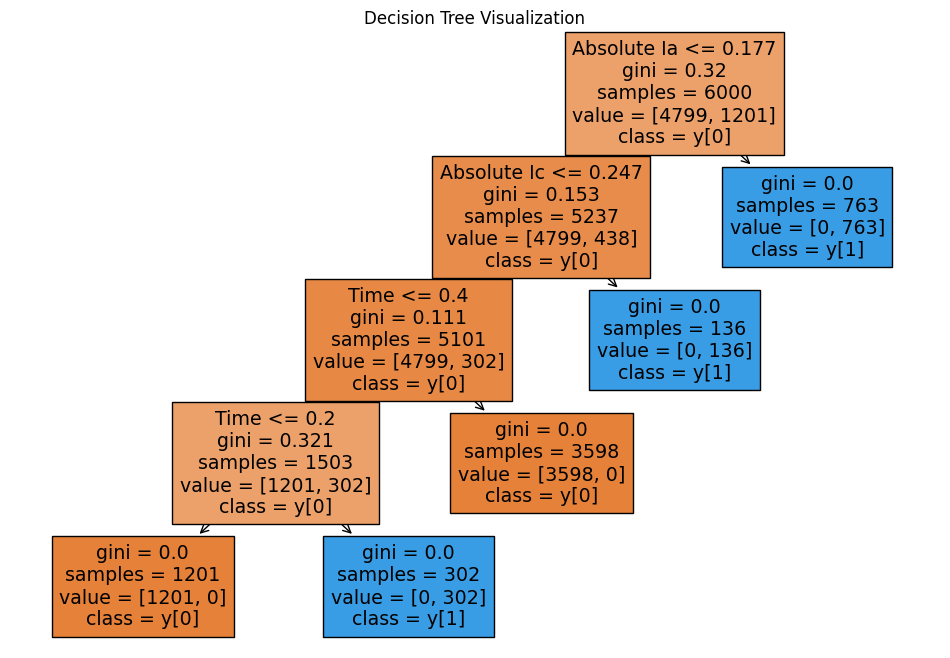

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_split=9, random_state=5)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your DecisionTreeClassifier


# Assuming 'fault' is the target column name
X = df.drop('Fault', axis=1)  # Dropping the 'fault' column
y = df['Fault']  # Keeping only the 'fault' column as the target variable

# Fitting the classifier with the data
clf.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()




In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=5)

In [ ]:
clf.feature_importances_

array([0.09253053, 0.19477732, 0.69984276, 0.0128494 ])

In [ ]:
df.columns

Index(['Time', 'Absolute Ia', 'Absolute Ib', 'Absolute Ic', 'Fault'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1278,    0],
       [   0,  222]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99555556, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
!pip install pytesseract


In [ ]:
!pip install pytesseract
import pytesseract
from PIL import Image

# Load the image using PIL (Python Imaging Library)
img = Image.open('/content/download2.png')

# Perform OCR on the image
extracted_text = pytesseract.image_to_string(img)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)


TesseractNotFoundError: ignored

In [ ]:
import cv2
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Load the cropped image
cropped_img = cv2.imread('/content/download2.png')

# Convert the cropped image to grayscale (required for OCR)
gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Perform OCR on the grayscale image
extracted_text = pytesseract.image_to_string(gray_img)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)


TesseractNotFoundError: ignored